In [54]:
import pandas as pd
import json
from sentiment_ensembler import SentimentEnsembler

In [23]:
sentiment_model = SentimentEnsembler()

2021-01-22 12:16:30,995 loading file /Users/joseph/.flair/models/sentiment-en-mix-distillbert_3.1.pt


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
df = pd.read_csv('./tmp_annotated_hydro.tsv', sep='\t', encoding='utf-8')

In [57]:
df.head(), df.shape

(   id_column                                           sentence     label  \
 0        499  High doses of hydroxychloroquine do not affect...  negative   
 1        167  Hydroxychloroquine for post-exposure prophylax...   neutral   
 2        403  Here we demonstrate that the combination of hy...   positve   
 3        486  Here we assessed the prophylactic/therapeutic ...   neutral   
 4        402  In vitro testing of combined hydroxychloroquin...   positve   
 
           annotated_at  
 0  2021-01-21 14:20:31  
 1  2021-01-21 14:21:04  
 2  2021-01-21 14:21:38  
 3  2021-01-21 14:22:15  
 4  2021-01-21 14:22:27  ,
 (736, 4))

In [58]:
df = df.dropna()
df.shape

(409, 4)

## Sentiment to gold labels

In [59]:
df['sentiment'] = df.sentence.apply(lambda x: sentiment_model(x))

In [60]:
df['label'].value_counts()

neutral     226
positve     109
negative     74
Name: label, dtype: int64

In [37]:
mean_neg = df[df['label']=='negative']['sentiment'].mean()
std_neg = df[df['label']=='negative']['sentiment'].std()

In [38]:
mean_neu = df[df['label']=='neutral']['sentiment'].mean()
std_neu = df[df['label']=='neutral']['sentiment'].std()

In [39]:
mean_pos = df[df['label']=='positve']['sentiment'].mean()
std_pos = df[df['label']=='positve']['sentiment'].std()

No handles with labels found to put in legend.


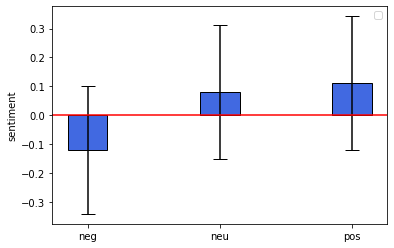

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# width of the bars
barWidth = 0.3

# Choose the height of the blue bars
bars = [mean_neg, mean_neu, mean_pos]


# Choose the height of the error bars (bars1)
yer = [std_neg, std_neu, std_pos]


# The x position of bars
r = np.arange(len(bars))

# Create blue bars
plt.bar(r, bars, width = barWidth, color = 'royalblue', edgecolor = 'black', yerr=yer, capsize=7)

# general layout
plt.xticks([r  for r in range(len(bars))], ['neg', 'neu', 'pos'])
plt.ylabel('sentiment')
plt.legend()

# Show graphic
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('sent-label.png')
plt.show()

## Sentence aggreament

In [61]:
with open("./results/found_sentences_hydro.json", "r") as jf:
    data = json.load(jf)
    
out_list = []
for k, v in data.items():
    if v:
        for sentence in v:
            out_list.append([k,sentence])
            
df_hydro = pd.DataFrame(out_list, columns=['PMID', 'sentence'])
df_hydro.head()

,PMID,sentence
0,32295814,Hydroxychloroquine and COVID-19.
1,32492293,A Randomized Trial of Hydroxychloroquine as Po...
2,32492293,Whether hydroxychloroquine can prevent symptom...
3,32492293,The incidence of new illness compatible with C...
4,32492293,After high-risk or moderate-risk exposure to C...


In [62]:
df_merge = pd.merge(df_hydro, df, on="sentence")

In [67]:
df_merge.head()


In [78]:
import seaborn as sns

In [87]:
df_merge_gb = df_merge.groupby("PMID").filter(lambda x: len(x) > 2)

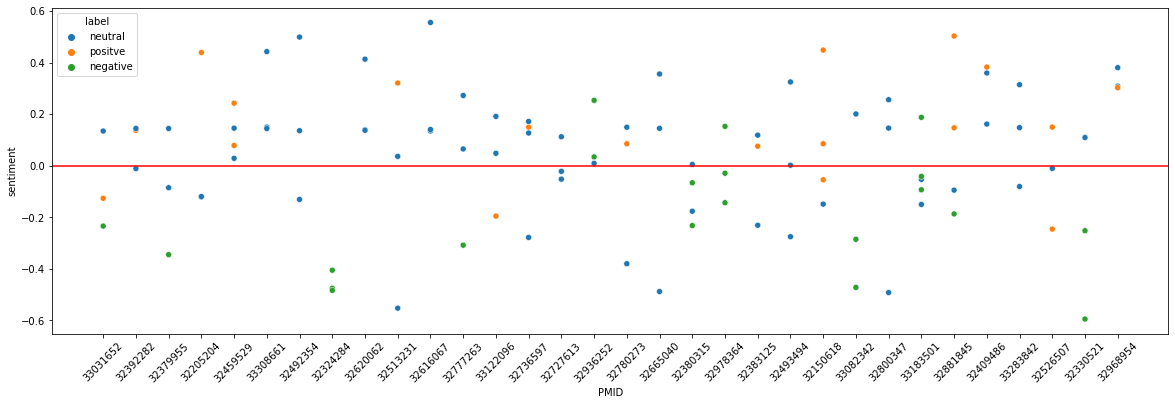

In [96]:
fig, ax = plt.subplots(figsize=(20,6))
sns.scatterplot(x='PMID', y='sentiment', hue='label', data=df_merge_gb)
plt.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.savefig('sentence_agreement.png')
plt.show()

## Sentence mean


In [109]:
# Manipulate the dataframe
df_mean = df_merge[['PMID','sentiment']].groupby('PMID').filter(lambda x: len(x) > 1)
df_mean = df_mean.groupby('PMID').mean()
df_mean.head()

,sentiment
PMID,
32150618,0.082639
32205204,0.066197
32297988,0.164210
32324284,-0.454447
32324331,0.531056


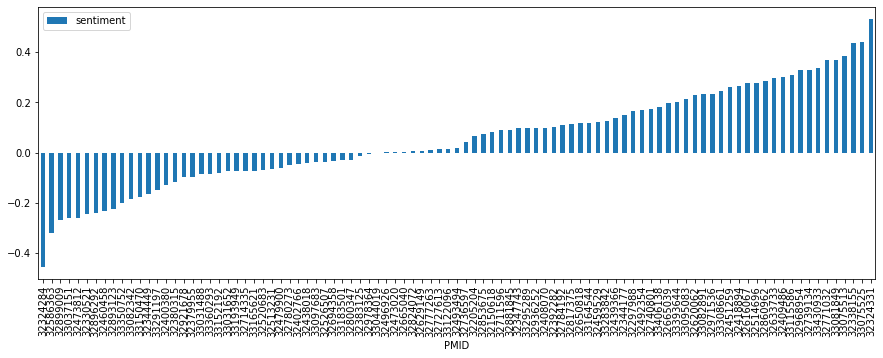

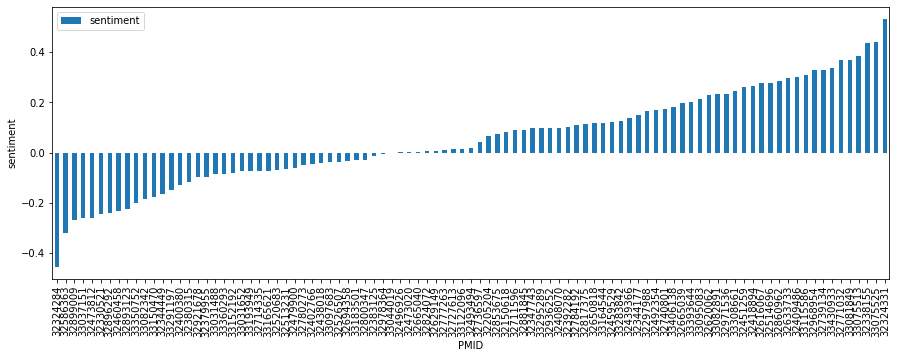

In [113]:
df_mean = df_mean.sort_values(['sentiment'],ascending=True)
# Plot the results
df_mean.plot(kind='bar', figsize=(15,5))
ax = df_mean.plot(kind='bar', figsize=(15,5))
ax.set_ylabel("sentiment")
ax.figure.savefig('sentence_mean.png')